# Age Estimation and Gender Classification


## Setting Up: Mount the google drive


In [1]:
#
# Add your code here
#

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Visualize a few photos


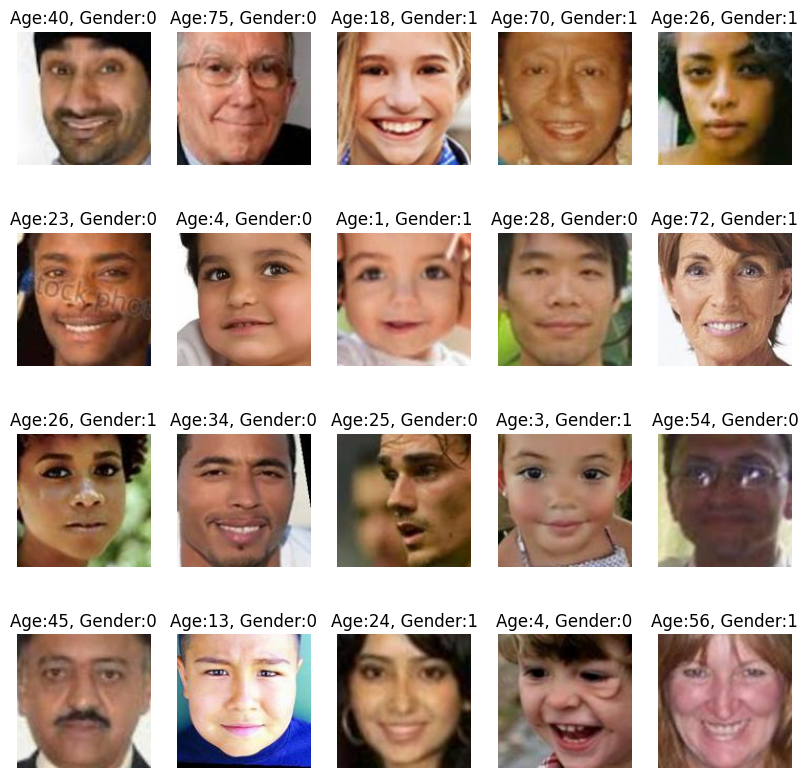

In [2]:
#
# Add your code here

#

import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/drive/MyDrive/Colab Notebooks/data/UTKFace/train_val/'
files = os.listdir(folder)

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    image = imread(folder + files[i], 0)
    plt.imshow(image)
    age_gender = files[i].split('_')
    plt.title('Age:'+ str(age_gender[0]) + ', Gender:' + str(age_gender[1]))
    plt.axis("off")
plt.show()

## Step 1: Data Pre-Processing



In [4]:
# Data Augmentation


from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Create an augmentation layer

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)])

# Generate augmented data by batch size


datagen = ImageDataGenerator(
    rotation_range=36,
    horizontal_flip=True,
    zoom_range=0.1)

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, {'age':train_age, 'gender': train_gender }))
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

## STEP2A: Build your own CNN network

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 128, 128, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 126, 126, 32)   │            896 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 126, 126, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 126, 126, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 63, 63, 32)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 61, 61, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 61, 61, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 61, 61, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 30, 30, 64)     │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 28, 28, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 28, 28, 128)    │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 28, 28, 128)    │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 14, 14, 128)    │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 12, 12, 256)    │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 12, 12, 256)    │          1,024 │ conv2d_3[0][0]         │
│ (BatchNormalization) 

 Total params: 5,175,490 (19.74 MB)

 Trainable params: 5,174,530 (19.74 MB)

 Non-trainable params: 960 (3.75 KB)

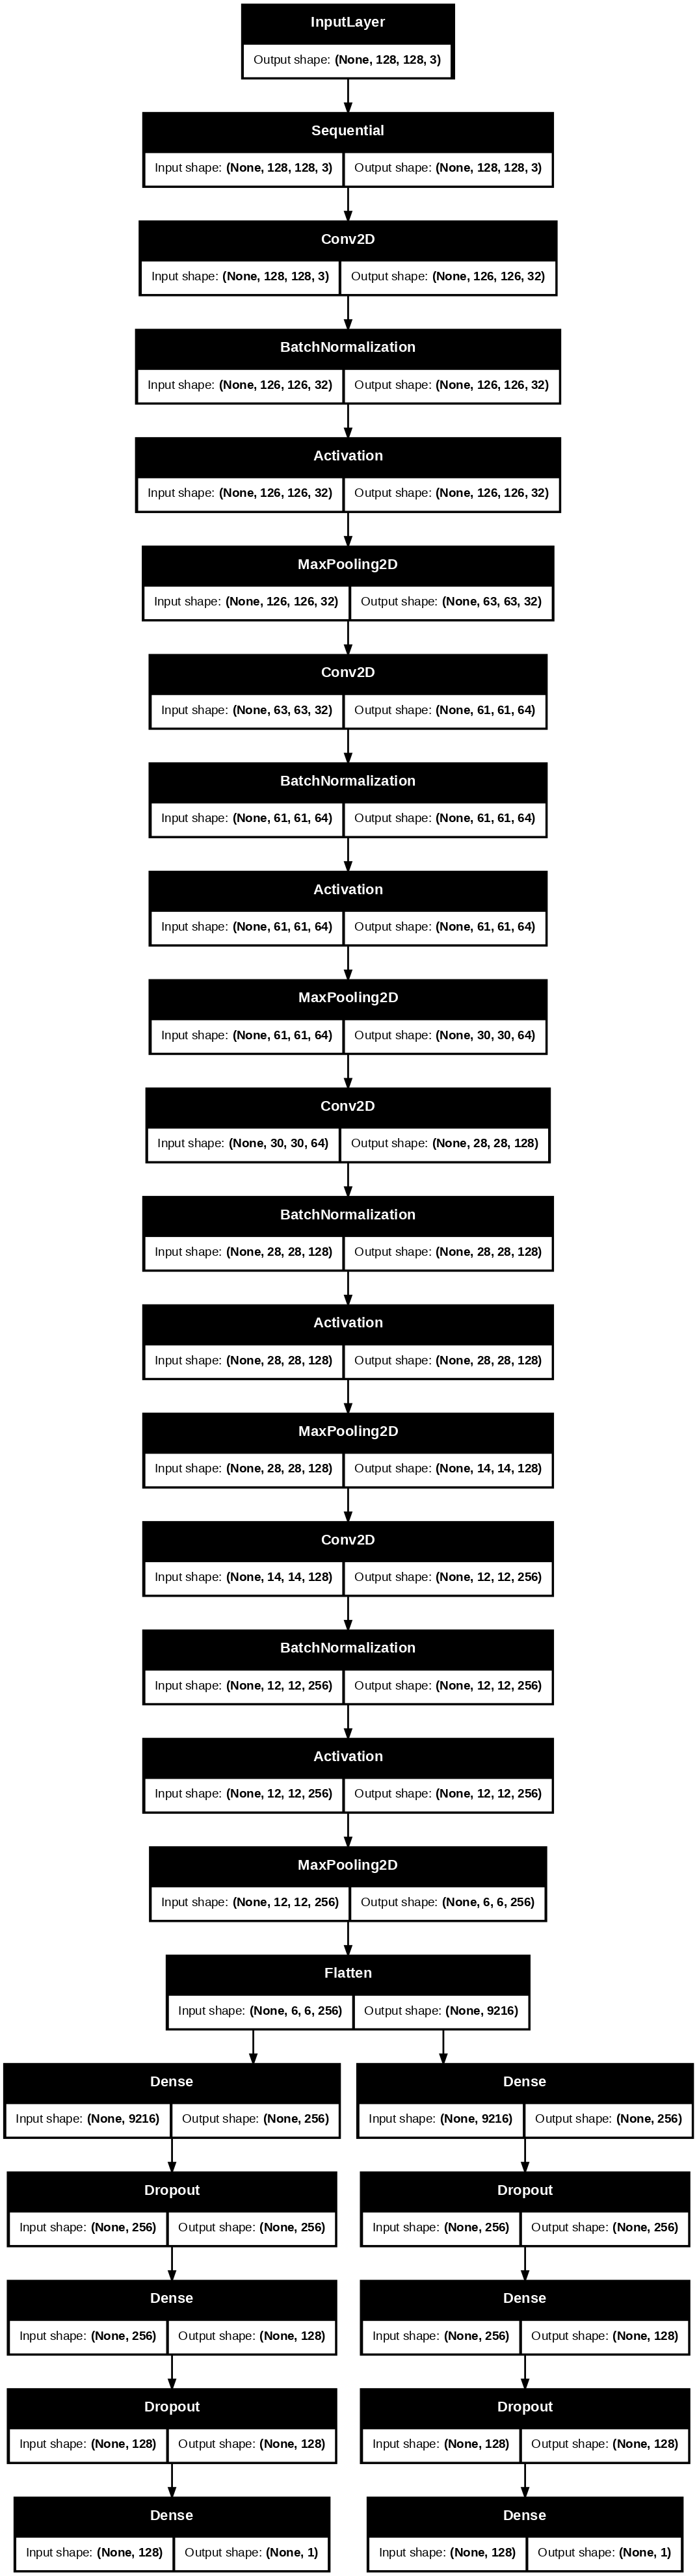

In [5]:
#
# Add your code here
#

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization,Activation
from tensorflow.keras.regularizers import l2

inputs = Input(shape=(128, 128, 3))

# Data augmentation layer

x = data_augmentation(inputs)

# Convolution Layers

x = Conv2D(32, (3, 3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)

# Flatten Layer

x = Flatten()(x)

# Dense Layer for Gender and Age

x1 = Dense(256, kernel_regularizer=l2(0.01), activation='relu')(x)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, kernel_regularizer=l2(0.01), activation='relu')(x1)
x1 = Dropout(0.3)(x1)
age = Dense(1, activation='linear', name = 'age')(x1)


x2 = Dense(256, kernel_regularizer=l2(0.01), activation='relu')(x)
x2 = Dropout(0.3)(x2)
x2 = Dense(128, kernel_regularizer=l2(0.01), activation='relu')(x2)
x2 = Dropout(0.3)(x2)
gender = Dense(1, activation='sigmoid', name = 'gender')(x2)


modelA = Model(inputs=inputs, outputs=[age, gender])



modelA.summary()
from tensorflow.keras.utils import plot_model
plot_model(modelA, show_shapes=True,dpi=100)

## STEP3A: Compile and train your model


In [17]:
#
# Add your code here
#

from tensorflow.keras.optimizers import Adam

# Compile

modelA.compile(loss={'age':'mae',  'gender':'binary_crossentropy'},
               metrics={'age':'mae', 'gender':'accuracy'},
               optimizer=Adam(learning_rate=1e-4))

epochs = 100

# Train


from tensorflow.keras.callbacks import EarlyStopping
es_callback = EarlyStopping(monitor='val_loss',
                            verbose=1,
                            min_delta = 0.01,
                            patience=10,
                            restore_best_weights=True)


historyA = modelA.fit(train_images, {'age':train_age,  'gender':train_gender},
                      validation_data=(val_images, {'age': val_age, 'gender': val_gender}),
                      epochs=epochs,
                      callbacks = [es_callback],
                      batch_size=32)

model_folder = '/content/drive/MyDrive/model/'
import os
if not os.path.exists(model_folder):
    os.mkdir(model_folder)
modelA.save(model_folder+'age_gender_A.keras')  # always save your model after training

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - age_loss: 17.6807 - age_mae: 17.6807 - gender_accuracy: 0.5701 - gender_loss: 0.7832 - loss: 31.3682 - val_age_loss: 23.0503 - val_age_mae: 23.1605 - val_gender_accuracy: 0.4570 - val_gender_loss: 0.7299 - val_loss: 35.3002
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - age_loss: 13.5512 - age_mae: 13.5512 - gender_accuracy: 0.6985 - gender_loss: 0.5789 - loss: 25.0767 - val_age_loss: 18.7236 - val_age_mae: 18.8088 - val_gender_accuracy: 0.7310 - val_gender_loss: 0.6375 - val_loss: 29.0967
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - age_loss: 12.6279 - age_mae: 12.6279 - gender_accuracy: 0.7581 - gender_loss: 0.5170 - loss: 22.4203 - val_age_loss: 14.8616 - val_age_mae: 14.9098 - val_gender_accuracy: 0.6690 - val_gender_loss: 0.6026 - val_loss: 23.7386
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - age_loss: 11.5537 - age_mae: 11.5537 - gender_accuracy: 0.7485 - gender_loss: 0.5161 - loss: 19.9996 - v

## STEP4A: Draw the learning curves
Draw four learning curve figures for model A as follows.
1.	The loss of the gender classification over the training and validation set
2.	The accuracy of the gender classification over the training and validation set
3.	The loss of the age estimation over the training and validation set
4.	The MAE of the age estimation over the training and validation set

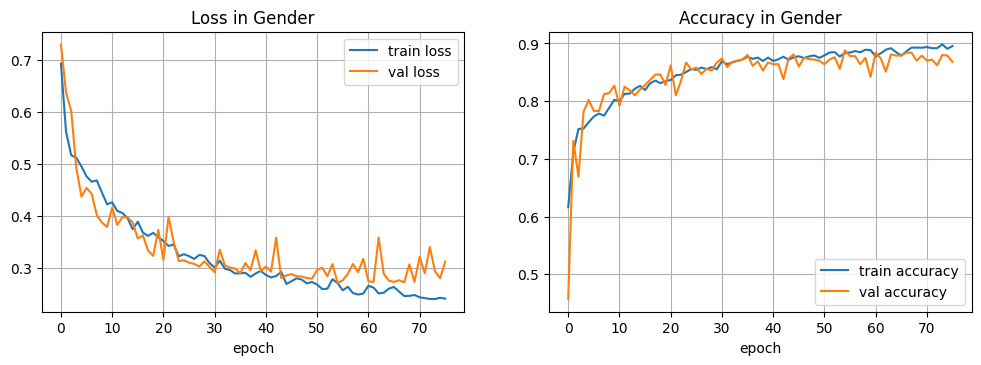

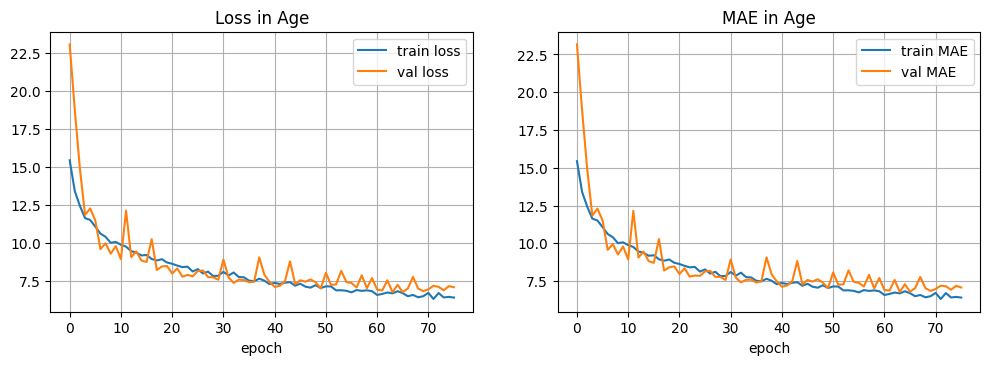

In [18]:
#
# Add your code here
#

fig = plt.figure(figsize=(12, 8))
fig.add_subplot(2,2,1)
plt.plot(historyA.history['gender_loss'], label='train loss')
plt.plot(historyA.history['val_gender_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')
plt.title('Loss in Gender')


fig.add_subplot(2,2,2)
plt.plot(historyA.history['gender_accuracy'], label='train accuracy')
plt.plot(historyA.history['val_gender_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

plt.title('Accuracy in Gender')


fig = plt.figure(figsize=(12, 8))
fig.add_subplot(2,2,1)
plt.plot(historyA.history['age_loss'], label='train loss')
plt.plot(historyA.history['val_age_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')
plt.title('Loss in Age')


fig.add_subplot(2,2,2)
plt.plot(historyA.history['age_mae'], label='train MAE')
plt.plot(historyA.history['val_age_mae'], label='val MAE')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

plt.title('MAE in Age')

plt.show()

## STEP2B: Build a CNN network based on a pre-trained model



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 128, 128, 64)   │          1,792 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 128, 128, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 64, 64, 64)     │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 64, 64, 128)    │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 64, 64, 128)    │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 32, 32, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 32, 32, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 32, 32, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 32, 32, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 16, 16, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 16, 16, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 16, 16, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 16, 16, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 8, 8, 512)      │              0 │ block4_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)     │ (None, 8, 8, 512)      │      2,359,808 │ block4_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv2 (Conv2D)     │ (None, 8, 8, 512)      │      2,359,808 │ block5_conv1[0][0]     │
├──────────────────────

 Total params: 15,241,026 (58.14 MB)

 Trainable params: 7,605,762 (29.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

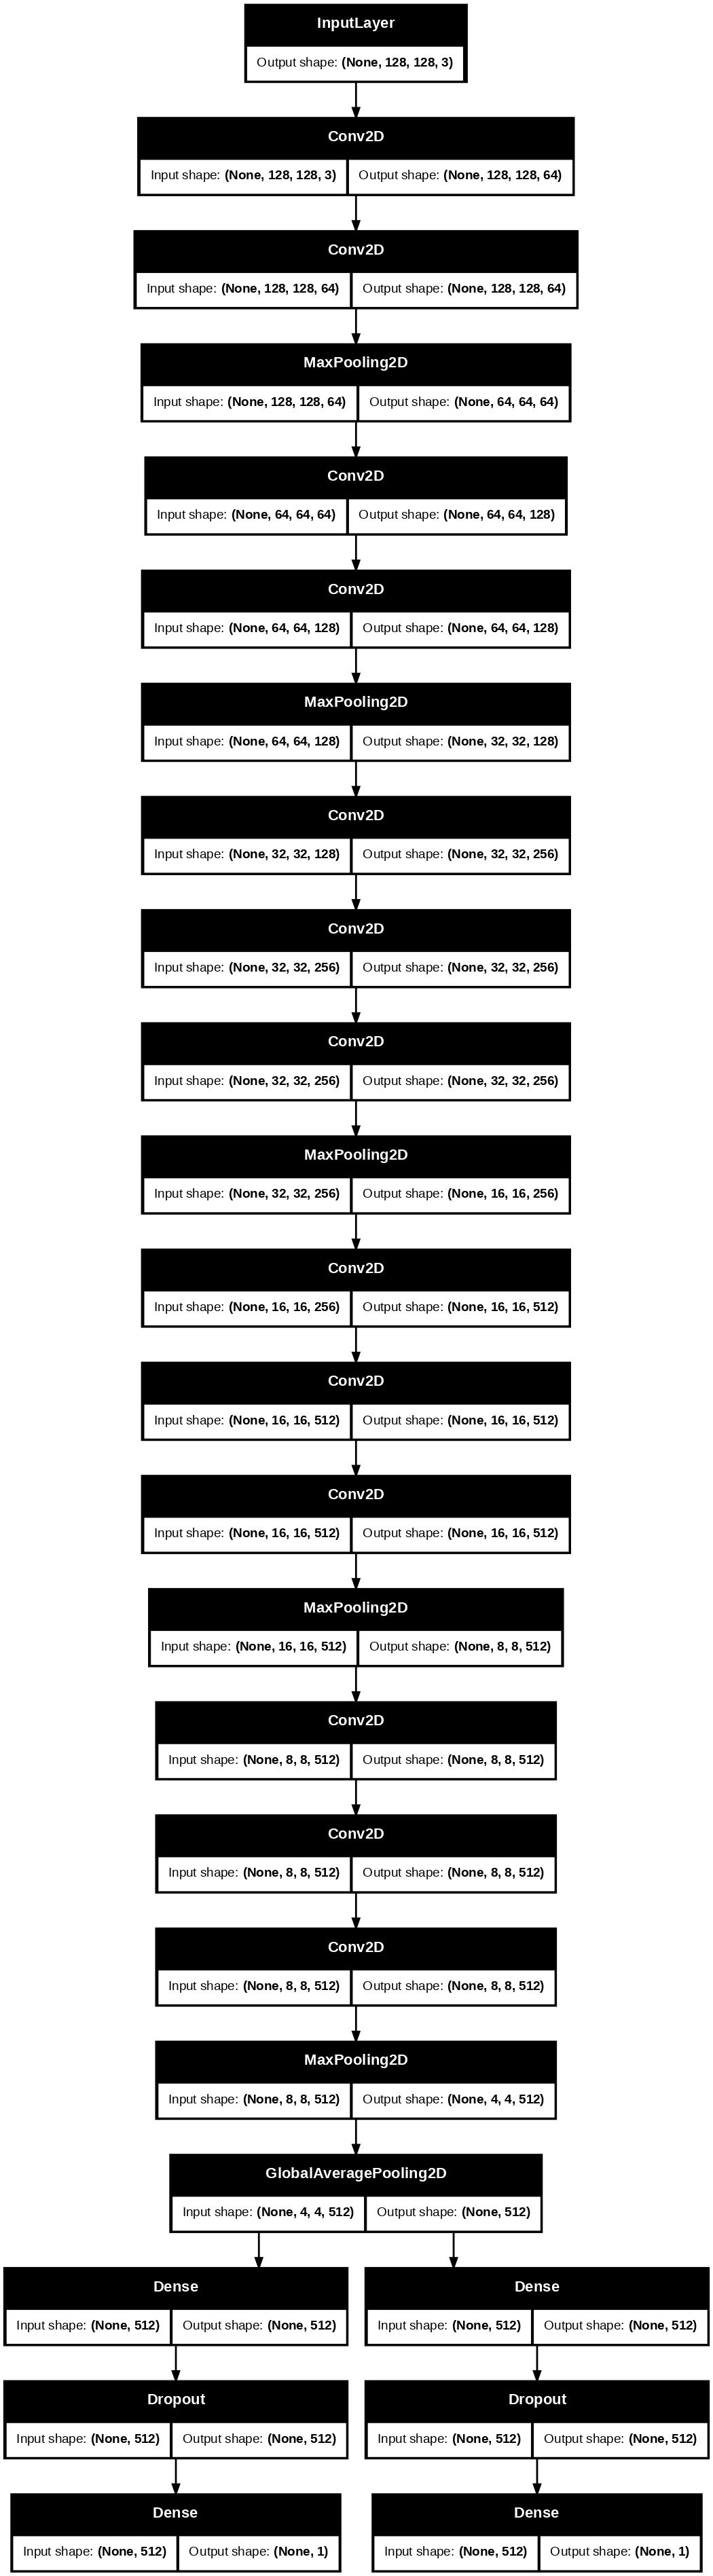

In [8]:
from re import X
#
# Add your code here
#

from tensorflow.keras import applications

inputs = Input(shape=(128, 128, 3))

# Call VGG16

base_model = applications.VGG16(input_shape=(128, 128, 3), weights="imagenet",  include_top=False)

# Set the early layers (up to the 'block5_conv1') to non-trainable

for layer in base_model.layers[:14]:
    layer.trainable = False

# Global Average Pooling Layer

x = layers.GlobalAveragePooling2D()(base_model.output)

# Dense Layer for Gender and Age

x1 = Dense(512, kernel_regularizer=l2(0.01), activation = 'relu')(x)
x1 = Dropout(0.5)(x1)
age = Dense(1, activation='linear', name = 'age')(x1)


x2 = Dense(512, kernel_regularizer=l2(0.01), activation='relu')(x)
x2 = Dropout(0.5)(x2)
gender = Dense(1, activation='sigmoid', name = 'gender')(x2)


modelB = Model(inputs=base_model.input, outputs=[age, gender])



modelB.summary()
from tensorflow.keras.utils import plot_model
plot_model(modelB, show_shapes=True,dpi=100)

## STEP3B: Compile and train your model


In [11]:
#
# Add your code here
#

# Complie

from tensorflow.keras.optimizers import SGD

modelB.compile(loss={'age':'mae',  'gender':'binary_crossentropy'},
               metrics={'age':'mae', 'gender':'accuracy'},
            optimizer=SGD(learning_rate=1e-4, momentum=0.9))

# Train


epochs = 100

from tensorflow.keras.callbacks import EarlyStopping
es_callback = EarlyStopping(monitor='val_loss',
                            min_delta = 0.01,
                            patience=5,
                            verbose = 1,
                            restore_best_weights=True)


historyB = modelB.fit(train_dataset,
                      validation_data=(val_images, {'age': val_age, 'gender': val_gender}),
                      epochs=epochs, callbacks =es_callback)

import os
if not os.path.exists(model_folder):
    os.mkdir(model_folder)
modelB.save(model_folder+"age_gender_B.keras")

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - age_loss: 25.1812 - age_mae: 25.1812 - gender_accuracy: 0.4989 - gender_loss: 0.8105 - loss: 36.2361 - val_age_loss: 12.2131 - val_age_mae: 12.2895 - val_gender_accuracy: 0.6680 - val_gender_loss: 0.6272 - val_loss: 23.1172
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - age_loss: 12.2926 - age_mae: 12.2926 - gender_accuracy: 0.6236 - gender_loss: 0.6973 - loss: 23.1862 - val_age_loss: 10.7915 - val_age_mae: 10.8621 - val_gender_accuracy: 0.7090 - val_gender_loss: 0.5921 - val_loss: 21.6036
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - age_loss: 11.0677 - age_mae: 11.0677 - gender_accuracy: 0.6460 - gender_loss: 0.6522 - loss: 21.8660 - val_age_loss: 9.6783 - val_age_mae: 9.7335 - val_gender_accuracy: 0.7330 - val_gender_loss: 0.5686 - val_loss: 20.4023
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - age_loss: 10.4269 - age_mae: 10.4269 - gender_accuracy: 0.6666 - gender_loss: 0.6163 - loss: 21.1392 - va

## STEP4B: Draw the learning curves


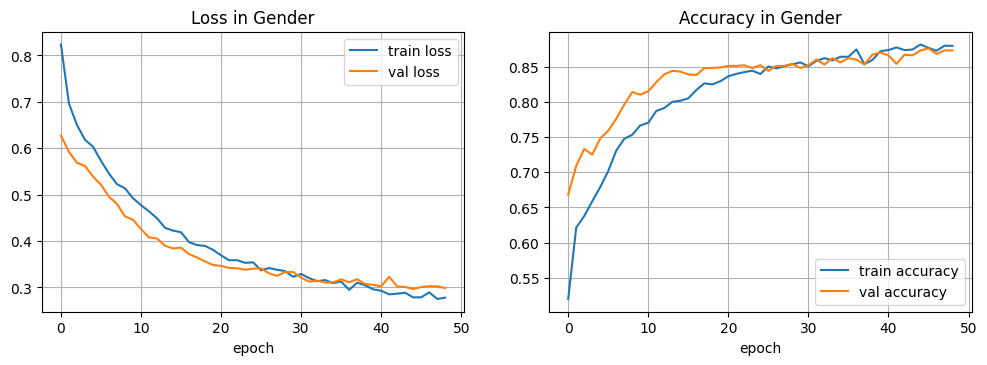

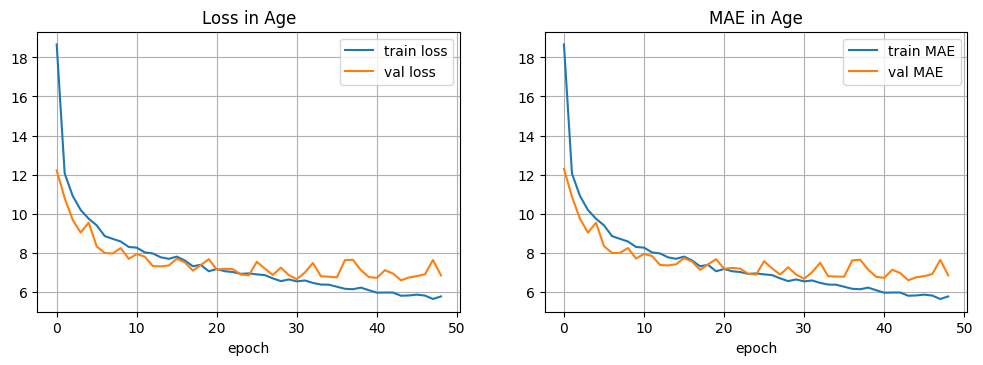

In [12]:
#
# Add your code here
#

fig = plt.figure(figsize=(12, 8))
fig.add_subplot(2,2,1)
plt.plot(historyB.history['gender_loss'], label='train loss')
plt.plot(historyB.history['val_gender_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')
plt.title('Loss in Gender')


fig.add_subplot(2,2,2)
plt.plot(historyB.history['gender_accuracy'], label='train accuracy')
plt.plot(historyB.history['val_gender_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

plt.title('Accuracy in Gender')


fig = plt.figure(figsize=(12, 8))
fig.add_subplot(2,2,1)
plt.plot(historyB.history['age_loss'], label='train loss')
plt.plot(historyB.history['val_age_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')
plt.title('Loss in Age')


fig.add_subplot(2,2,2)
plt.plot(historyB.history['age_mae'], label='train MAE')
plt.plot(historyB.history['val_age_mae'], label='val MAE')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

plt.title('MAE in Age')

plt.show()